## **DATA LOADING AND PREPROCESSING**

In [66]:
import pandas as pd
import numpy as np

import warnings 
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv("train.csv")
train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

The dataset includes 2000 rows and 21 columns.

## **Duplicate Values**

In [6]:
print(f"There are {train.duplicated().sum()} duplicated values in the train set")

There are 0 duplicated values in the train set


## **Null Values**

In [7]:
train.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

There are no null values in the train set.

## **Outliers**

## **Datatype Conversion**

In [25]:
# Convert categorical columns to categorical train type
cat_cols = ["blue", "dual_sim", "four_g", "three_g", "touch_screen", "wifi", "price_range"]
train[cat_cols] = train[cat_cols].astype('category')

# Confirm the train types after conversion
print(train.dtypes)


battery_power       int64
blue             category
clock_speed       float64
dual_sim         category
fc                  int64
four_g           category
int_memory          int64
m_dep             float64
mobile_wt           int64
n_cores             int64
pc                  int64
px_height           int64
px_width            int64
ram                 int64
sc_h                int64
sc_w                int64
talk_time           int64
three_g          category
touch_screen     category
wifi             category
price_range      category
dtype: object


## **Dropping of similar, irrelevant and highly correlated features**

# **EXPLORATORY DATA ANALYSIS**

## **1. Histogram Summary**

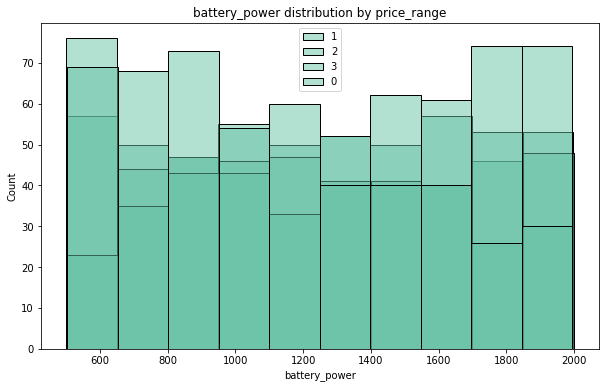

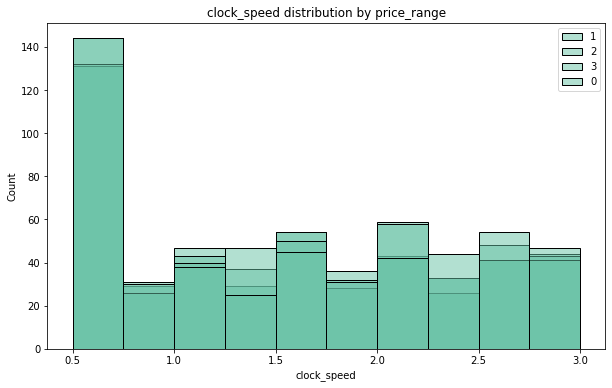

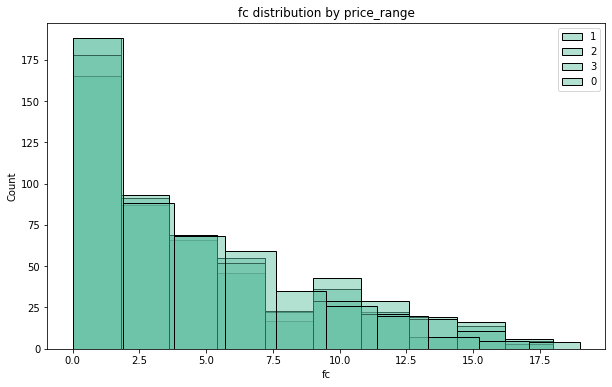

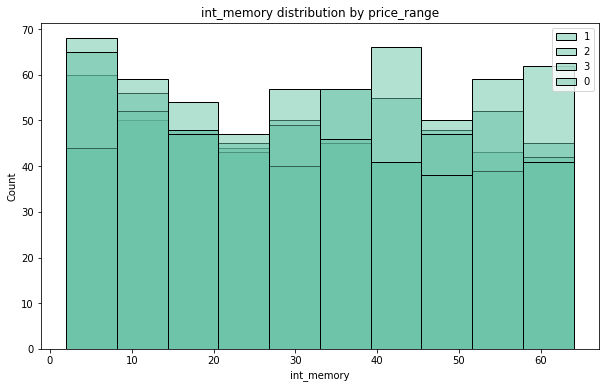

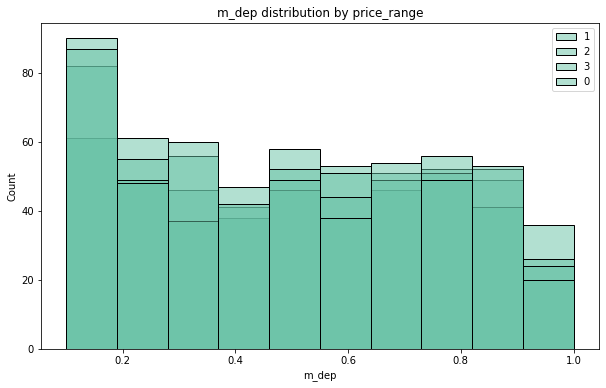

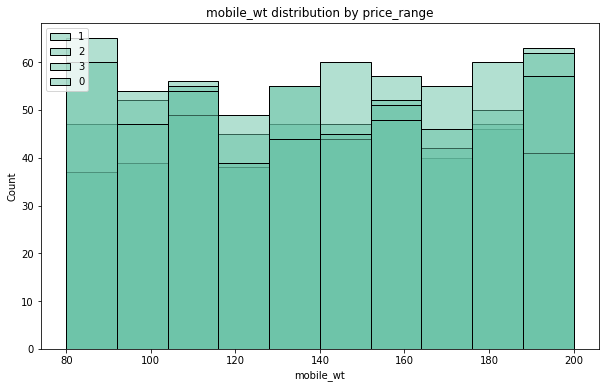

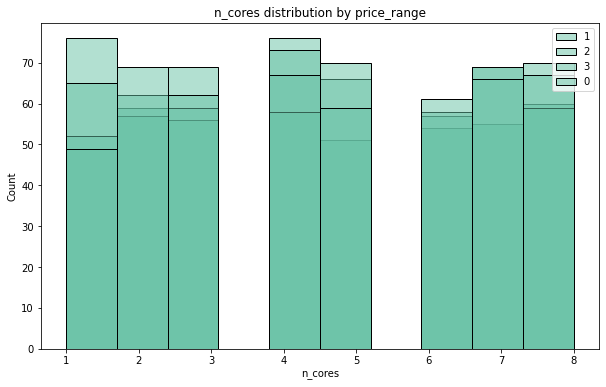

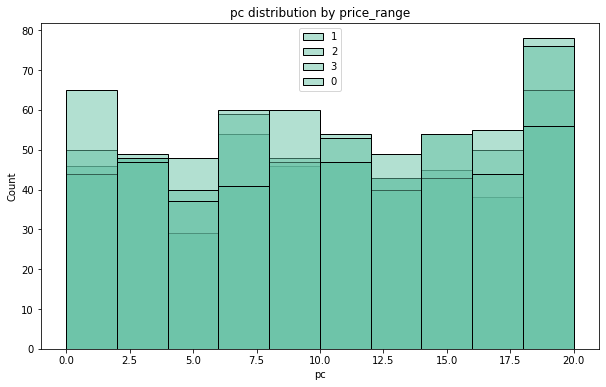

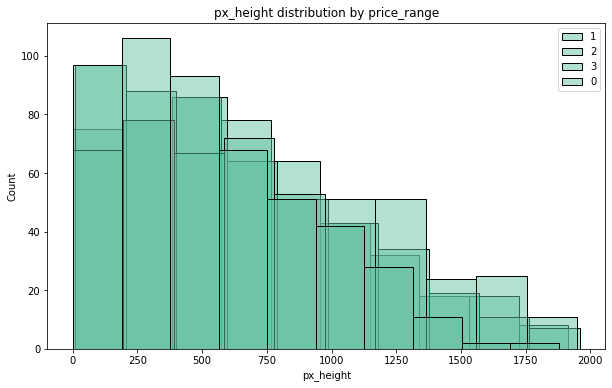

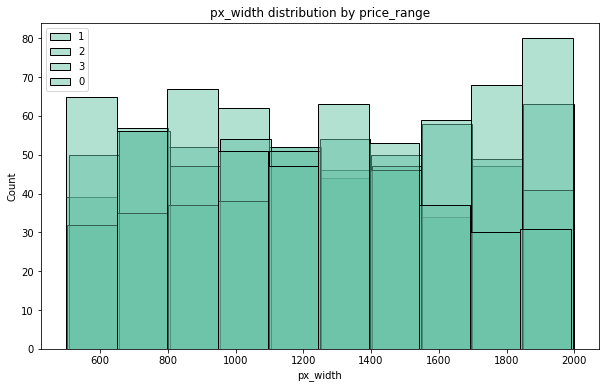

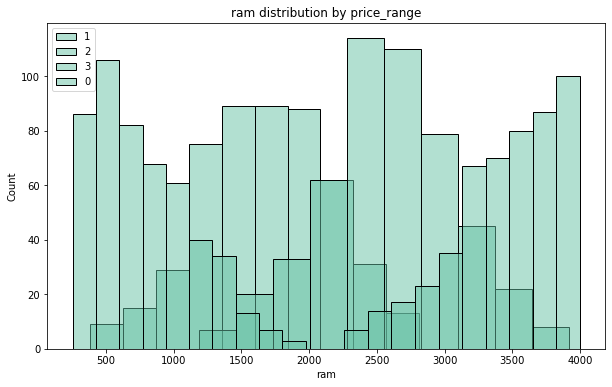

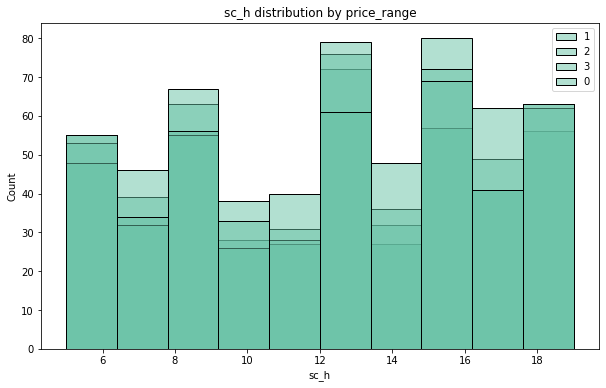

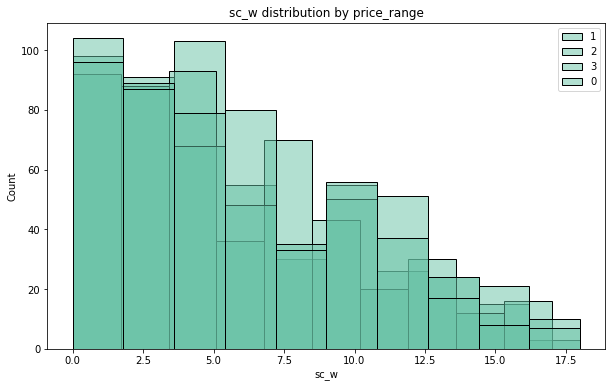

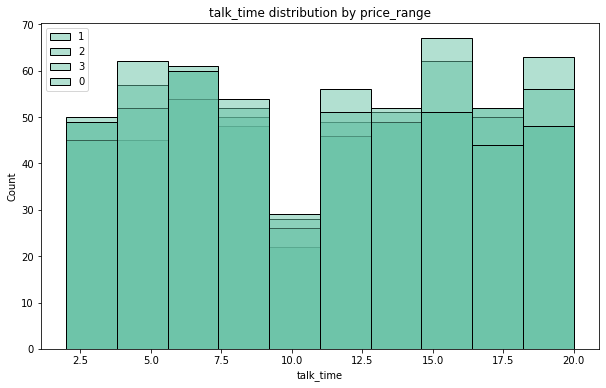

In [21]:
# Segragate numerical columns
numerical_cols = train[["battery_power", "clock_speed", "fc", "int_memory", "m_dep", "mobile_wt", "n_cores", "pc", "px_height", "px_width", "ram", "sc_h", "sc_w", "talk_time"]]
#sns.set_palette("Set2")

palette = {
    0: "#FF0000",
    1: "#0000FF",
    2: "#00FF00",
    3: "#4CAF50"
}

train["price_range"] = train["price_range"].astype("category")

# Iterate over the numerical columns and create histograms
for column in numerical_cols:
    plt.figure(figsize = (10, 6))
    for price_range in train["price_range"].unique():
        sns.histplot(train[train["price_range"] == price_range][column], label = price_range, palette = palette, alpha = 0.5, bins = 10)

    plt.title(f"{column} distribution by price_range")
    plt.xlabel(column)
    plt.legend()
    plt.show()

## **2. Correlation Summary**

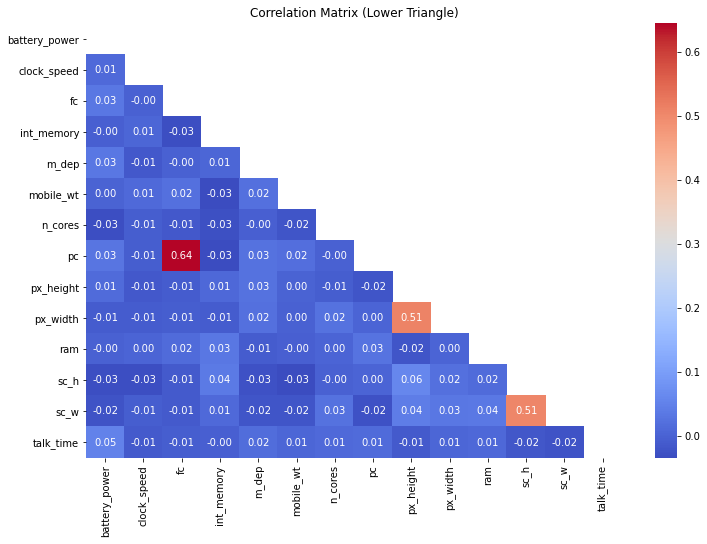

In [31]:
# Select numerical columns
numerical_cols = train.select_dtypes(include=[np.number])

# Compute the correlation matrix
corr_matrix = numerical_cols.corr()

# Mask for the lower triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Plot the correlation matrix for the lower triangle
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", mask=mask)
plt.title('Correlation Matrix (Lower Triangle)')
plt.show()


## **3. Boxplot Summary**

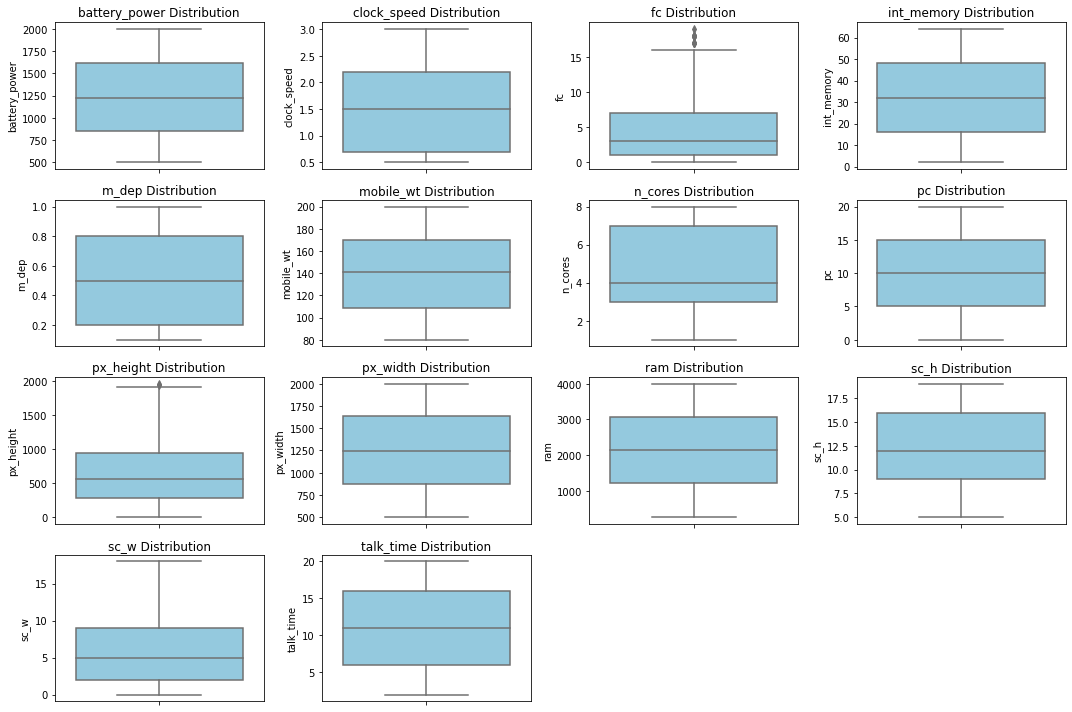

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical columns
numerical_cols = train.select_dtypes(include=['int64', 'float64'])

# Create subplots for each numerical column
plt.figure(figsize=(15, 10))

# Plot box plots for each numerical column
for i, column in enumerate(numerical_cols.columns):
    plt.subplot(4, 4, i+1)
    sns.boxplot(y=column, data=train, color='skyblue')
    plt.title(f'{column} Distribution')

plt.tight_layout()
plt.show()


# **MODELLING**

In [38]:
test = pd.read_csv("test.csv")
test.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [44]:
def clean_test_data(test_data, categorical_cols):
    # Check for null values
    null_values = test_data.isnull().sum()
    if null_values.sum() > 0:
        print("Null values found. Handling missing values...")
        # Handle missing values here (e.g., imputation)
        # For demonstration purposes, we'll just drop rows with null values
        test_data = test_data.dropna()
    
    # Check for duplicates
    num_duplicates = test_data.duplicated().sum()
    if num_duplicates > 0:
        print("Duplicate rows found. Removing duplicates...")
        test_data = test_data.drop_duplicates()
    
    # Convert categorical columns to category type
    for col in categorical_cols:
        test_data[col] = test_data[col].astype('category')
    
    return test_data

# Specify the list of categorical columns
categorical_columns = ["blue", "dual_sim", "four_g", "three_g", "touch_screen", "wifi"]

# Clean the test data before modeling
test_data = clean_test_data(test, categorical_columns)
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   id             1000 non-null   int64   
 1   battery_power  1000 non-null   int64   
 2   blue           1000 non-null   category
 3   clock_speed    1000 non-null   float64 
 4   dual_sim       1000 non-null   category
 5   fc             1000 non-null   int64   
 6   four_g         1000 non-null   category
 7   int_memory     1000 non-null   int64   
 8   m_dep          1000 non-null   float64 
 9   mobile_wt      1000 non-null   int64   
 10  n_cores        1000 non-null   int64   
 11  pc             1000 non-null   int64   
 12  px_height      1000 non-null   int64   
 13  px_width       1000 non-null   int64   
 14  ram            1000 non-null   int64   
 15  sc_h           1000 non-null   int64   
 16  sc_w           1000 non-null   int64   
 17  talk_time      1000 non-null   int

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay


# Separate features (X) and target variable (y)
X = train.drop(columns=["price_range"])
y = train['price_range']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Example usage:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1600, 20)
y_train shape: (1600,)
X_test shape: (400, 20)
y_test shape: (400,)


## **One-vs-Rest Multiclass Strategy**

Logistic Regression (One-vs-Rest) Classifier:

Accuracy: 79.5

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.93      0.92       105
           1       0.69      0.60      0.64        91
           2       0.64      0.63      0.64        92
           3       0.88      0.96      0.91       112

    accuracy                           0.80       400
   macro avg       0.78      0.78      0.78       400
weighted avg       0.79      0.80      0.79       400

Confusion Matrix:


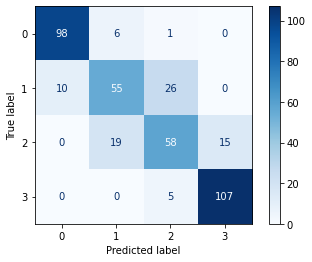

In [62]:
# from sklearn.multiclass import OneVsRestClassifier

# # Create a logistic regression instance
# model = LogisticRegression()

# # Define the OvR strategy
# ovr = OneVsRestClassifier(model)

# # Train the model
# ovr.fit(X_train, y_train)

# # Make predictions
# y_pred = ovr.predict(X_test)

# Initialize the Logistic Regression classifier with OvR strategy
logreg_classifier = LogisticRegression(multi_class='ovr', solver='liblinear', random_state=42)

# Train the classifier
logreg_classifier.fit(X_train, y_train)

# Predictions
logreg_pred = logreg_classifier.predict(X_test)

print("Logistic Regression (One-vs-Rest) Classifier:\n")

# Evaluate the model
accuracy = round(accuracy_score(y_test, logreg_pred) * 100, 2)
classification_report_result = classification_report(y_test, logreg_pred)
conf_matrix = confusion_matrix(y_test, logreg_pred)

print(f"Accuracy: {accuracy}")
print("\nClassification Report:\n", classification_report_result)



# Display confusion matrix as a heatmap
print("Confusion Matrix:")
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=logreg_classifier.classes_)
disp.plot(cmap='Blues')

## **One-vs-One Multiclass Strategy (OvO)**

Logistic Regression (One-vs-One) Classifier:

Accuracy: 73.5

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.84      0.89       105
           1       0.64      0.68      0.66        91
           2       0.57      0.59      0.58        92
           3       0.78      0.80      0.79       112

    accuracy                           0.73       400
   macro avg       0.73      0.73      0.73       400
weighted avg       0.74      0.73      0.74       400

Confusion Matrix:


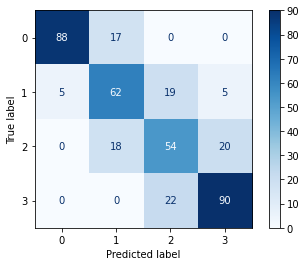

In [71]:
from sklearn.multiclass import OneVsOneClassifier


# Create a logistic regression instance
model_ovo = LogisticRegression()

# Define the OvO strategy
ovo = OneVsOneClassifier(model_ovo)

# Train the model
ovo.fit(X_train, y_train)

# Make predictions
y_pred = ovo.predict(X_test)

print("Logistic Regression (One-vs-One) Classifier:\n")

# Evaluate the model
accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)
classification_report_result = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("\nClassification Report:\n", classification_report_result)



# Display confusion matrix as a heatmap
print("Confusion Matrix:")
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=ovo.classes_)
disp.plot(cmap='Blues')

## **Multinomial Method**

Logistic Regression (Multinomial) Classifier:

Accuracy: 63.25

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.75      0.79       105
           1       0.52      0.51      0.51        91
           2       0.48      0.50      0.49        92
           3       0.69      0.73      0.71       112

    accuracy                           0.63       400
   macro avg       0.63      0.62      0.62       400
weighted avg       0.64      0.63      0.63       400

Confusion Matrix:


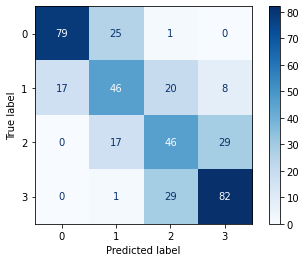

In [72]:
# Create multinomial logistic regression instance

model_mn = LogisticRegression(multi_class="multinomial")

# Train the model_mn
model_mn.fit(X_train, y_train)

# Make predictions
y_pred_mn = model_mn.predict(X_test)

print("Logistic Regression (Multinomial) Classifier:\n")
# Evaluate the model
accuracy = round(accuracy_score(y_test, y_pred_mn) * 100, 2)
classification_report_result = classification_report(y_test, y_pred_mn)
conf_matrix = confusion_matrix(y_test, y_pred_mn)

print(f"Accuracy: {accuracy}")
print("\nClassification Report:\n", classification_report_result)



# Display confusion matrix as a heatmap
print("Confusion Matrix:")
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model_mn.classes_)
disp.plot(cmap='Blues')

## **Hyperparameter Tuning**

Best Parameters: {'classifier__C': 10, 'classifier__penalty': 'l1'}
Logistic Regression Classifier (with GridSearchCV and Scaling):

Accuracy: 88.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.98       105
           1       0.78      0.74      0.76        91
           2       0.73      0.80      0.77        92
           3       0.98      0.99      0.99       112

    accuracy                           0.88       400
   macro avg       0.87      0.87      0.87       400
weighted avg       0.88      0.88      0.88       400

Confusion Matrix:


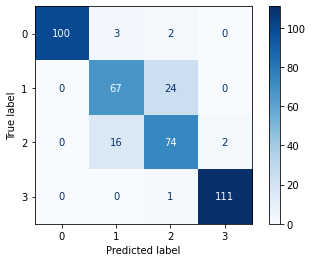

In [74]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Define pipeline with scaler and logistic regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(multi_class='ovr', solver='liblinear', random_state=42))
])

# Define parameter grid for GridSearchCV
param_grid = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'classifier__penalty': ['l1', 'l2']  # Penalty type
}

# Perform GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get best parameters and best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print("Best Parameters:", best_params)

# Make predictions with best estimator
y_pred = best_estimator.predict(X_test)

# Evaluate the model
accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)
classification_report_result = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Logistic Regression Classifier (with GridSearchCV and Scaling):\n")
print(f"Accuracy: {accuracy}")
print("\nClassification Report:\n", classification_report_result)
# print("Confusion Matrix:")
# print(conf_matrix)

# Display confusion matrix as a heatmap
print("Confusion Matrix:")
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=grid_search.classes_)
disp.plot(cmap='Blues')
